In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from iminuit import Minuit
from scipy.optimize import basinhopping
from scipy.optimize import curve_fit
import emcee
from pprint import pprint

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood(A,f_b,alpha_H,poisson):
    alpha_L = 1.0
    
    perdata092 = pd.read_csv("perlist092.csv")
    f = perdata092['f']
    per = perdata092['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
     
    
    length = len(perdata092)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    print (D)
    return D

In [3]:
m=Minuit(twi_minus_loglikelihood,A=0.01,f_b=1.7E-4,alpha_H=3.8,poisson=0.8,
         error_A=0.0001,error_f_b=1.0E-5,error_alpha_H=0.01,error_poisson=0.01,
         limit_A=(0.001,0.1), limit_f_b=(1.0E-5,1.0E-3),limit_alpha_H=(1.5,5.0),limit_poisson=(0,2),
         errordef=1)

In [4]:
m.migrad()

2430.426329662136
2430.4234634555773
2430.4292000720357
2430.397856425804
2430.4552232332967
2430.414959395117
2430.438024867562
2430.405123904192
2430.448694817466
2430.429556764
2430.423102549678
2430.458600200346
2430.394058064702
2430.154716604584
2430.69822692864
2429.8780327415566
2430.975785977374
2430.394058064702
2430.264961515795
2429.942155111285
2428.973219310257
2426.052522763028
2415.792402763229
2367.007470477257
2367.1794394182925
2366.8377846746416
2367.1281702952692
2366.8878998114874
2367.0626186946834
2366.952428844851
2367.1873563758145
2366.828713759777
2367.431617125784
2366.627290950731
2367.072470866712
2366.9435998297613
2366.8284152858546
2367.18702936305
2366.739568163709
2367.276501944969
2316.7822788501926
2312.4221364533378
2310.9868434422733
2309.626731229447
2309.4739960099664
2309.781189824697
2309.3936379058737
2309.8705606888834
2309.5509000495717
2309.7036641998866
2309.6571508786046
2309.59706415749
2309.4030577406957
2309.8514316914197
2287.913467

FCN = 2223.0679199121387 
 TOTAL NCALL = 260 
 NCALLS = 260 
 
 
 EDM = 4.417285803904333e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,A,0.0589611,0.0762249,,,0.001,0.1,No
1,f_b,2.58867e-05,2.61058e-05,,,1e-05,0.001,No
2,alpha_H,2.6504,0.327917,,,1.5,5,No
3,poisson,1.27575,0.0479439,,,0,2,No


({'fval': 2223.0679199121387,
  'edm': 4.417285803904333e-05,
  'nfcn': 260,
  'up': 1.0,
  'is_valid': True,
  'has_valid_parameters': True,
  'has_accurate_covar': True,
  'has_posdef_covar': True,
  'has_made_posdef_covar': False,
  'hesse_failed': False,
  'has_covariance': True,
  'is_above_max_edm': False,
  'has_reached_call_limit': False},
 [{'number': 0,
   'name': 'A',
   'value': 0.05896107947128646,
   'error': 0.07622493988216084,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': 0.001,
   'upper_limit': 0.1},
  {'number': 1,
   'name': 'f_b',
   'value': 2.5886662682344982e-05,
   'error': 2.6105785337147826e-05,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': 1e-05,
   'upper_limit': 0.001},
  {'number': 2,
   'name': 'alpha_H',
   'value': 2.6504036385256313,
   'error': 0.3279167465365562

In [5]:
pprint(m.fval)
m.print_param()

#2223.067974962621

2223.0679199121387


+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,A,0.0589611,0.0762249,,,0.001,0.1,No
1,f_b,2.58867e-05,2.61058e-05,,,1e-05,0.001,No
2,alpha_H,2.6504,0.327917,,,1.5,5,No
3,poisson,1.27575,0.0479439,,,0,2,No


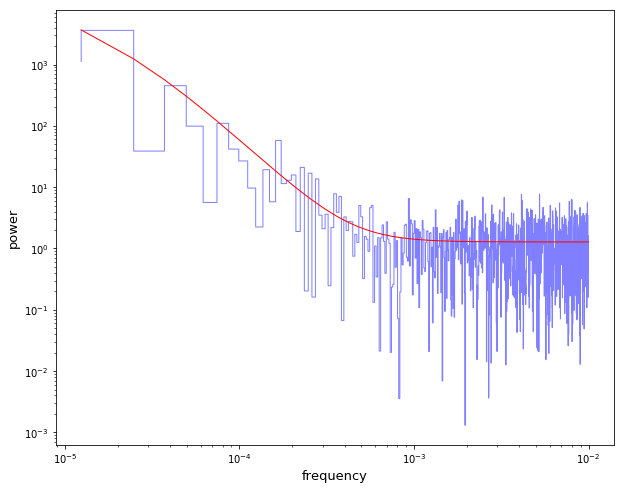

In [6]:
perdata092 = pd.read_csv("perlist092.csv")
f = perdata092['f']
per = perdata092['per']

alpha_L = 1.0
A,f_b,alpha_H,poisson = m.values[0],m.values[1],m.values[2],m.values[3]

model = []
f_length = len(f)
for i in range(f_length):
    model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f, per, color="b", alpha=0.5, linewidth=1)
plt.plot(f, model, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=13)
plt.ylabel("power",fontsize=13)
plt.show()

In [7]:
def twi_minus_loglikelihood_nobreak(A,alpha,poisson):
    alpha_L = 1.0
    
    perdata092 = pd.read_csv("perlist092.csv")
    f = perdata092['f']
    per = perdata092['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*A+poisson)
     
    
    length = len(perdata092)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    print (D)
    return D

In [8]:
n=Minuit(twi_minus_loglikelihood_nobreak,A=1.0E-7,alpha=2.0,poisson=1.0,
         error_A=0.0001,error_alpha=0.01,error_poisson=0.01,
         limit_A=(0.0000001,0.1),limit_alpha=(1.0,5.0),limit_poisson=(0,2),
         errordef=1)

In [9]:
n.migrad()

2296.03405078319
2274.9593440196886
2329.1539010835886
2293.33735893572
2298.8604701261365
2295.871924448722
2296.1966543749213
2295.7886267650906
2296.2805701126667
2295.941727312014
2296.126495472683
2295.7568942821945
2296.3123025958384
2248.7230141897758
2238.490709397152
2238.5453841985054
2238.436823604038
2238.535454581634
2238.446669336058
2238.4023506713315
2238.5797145155566
2230.7961001543736
2229.03175990663
2229.0271837618343
2229.037641106729
2229.0155340214556
2229.0491490729064
2229.0173384892437
2229.0469204411943
2228.814853991606
2228.768852683645
2228.776891204266
2228.7618613508525
2228.764946737587
2228.773806833959
2228.772503903064
2228.766181962714
2228.711144867861
2228.4852790065647
2227.9574891196175
2226.855711364941
2233.4023093966284
2227.5574244462564
2226.9484994466416
2226.8693608546446
2226.8427518237613
2226.864130855857
2226.848313715212
2226.880860998036
2226.831527627564
2228.5970109996
2226.717567442329
2226.7360013351135
2226.700019539129
2226.7

FCN = 2226.109775804982 
 TOTAL NCALL = 127 
 NCALLS = 127 
 
 
 EDM = 1.707294043098162e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,A,1.00001e-07,4.87312e-08,,,1e-07,0.1,No
1,alpha,2.15942,0.0193174,,,1,5,No
2,poisson,1.25366,0.0467902,,,0,2,No


({'fval': 2226.109775804982,
  'edm': 1.707294043098162e-05,
  'nfcn': 127,
  'up': 1.0,
  'is_valid': True,
  'has_valid_parameters': True,
  'has_accurate_covar': True,
  'has_posdef_covar': True,
  'has_made_posdef_covar': False,
  'hesse_failed': False,
  'has_covariance': True,
  'is_above_max_edm': False,
  'has_reached_call_limit': False},
 [{'number': 0,
   'name': 'A',
   'value': 1.0000064585494537e-07,
   'error': 4.87312067912606e-08,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': 1e-07,
   'upper_limit': 0.1},
  {'number': 1,
   'name': 'alpha',
   'value': 2.1594162343238548,
   'error': 0.01931744541314262,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': 1.0,
   'upper_limit': 5.0},
  {'number': 2,
   'name': 'poisson',
   'value': 1.2536609500519025,
   'error': 0.04679023410554162,
   

In [10]:
pprint(n.fval)
n.print_param()

2226.109775804982


+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,A,1.00001e-07,4.87312e-08,,,1e-07,0.1,No
1,alpha,2.15942,0.0193174,,,1,5,No
2,poisson,1.25366,0.0467902,,,0,2,No


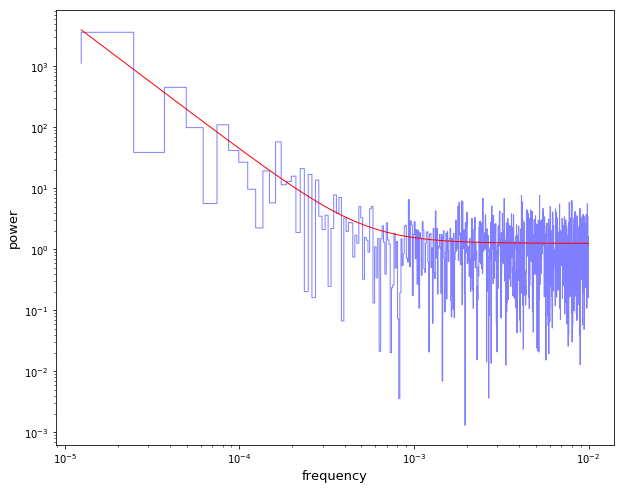

In [11]:
A,alpha,poisson = n.values[0],n.values[1],n.values[2]

model2 = []
f_length = len(f)
for i in range(f_length):
    model2.append((f[i]**(-alpha))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f, per, color="b", alpha=0.5, linewidth=1)
plt.plot(f, model2, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=13)
plt.ylabel("power",fontsize=13)
plt.show()

In [12]:
# 对无截断幂律谱尝试emcee

# 均匀先验

def lnprior(theta):
    A,alpha,poisson = theta
    if 1.0E-8 < A < 1.0E-7 and 1.0 < alpha < 4.0 and 0.0 < poisson < 2.0:
        return 0.0
    return -np.inf

# 后验概率？

def lnprob(theta):
    A,alpha,poisson = theta
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return (lp - 0.5* twi_minus_loglikelihood_nobreak(A,alpha,poisson))

In [13]:
# emcee

ndim, nwalkers = 3, 100
pos = [[n.values[0],n.values[1],n.values[2]] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)
sampler.run_mcmc(pos, 500)

F:\Anaconda\lib\site-packages\emcee\ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
F:\Anaconda\lib\site-packages\emcee\ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


2232.2349381514364
2227.331593744261
2231.101802848029
2235.0475905460344
2226.3109751479783
2226.0932647444724
2229.079688904646
2248.4992072204063
2250.3708020495164
2267.8327401855568
2247.0394548355926
2246.103220040645
2278.1311813686016
2248.2155725330804
2301.4702533417003
2249.244362276417
2247.3170279569476
2229.3432976098848
2226.928347486061
2248.7377725541814
2351.4935138104315
2264.0871456835102
2226.2063292656344
2237.7866077705744
2264.9539077329873
2260.9627291908673
2244.7104030371934
2228.813713105681
2263.8294748234343
2231.3642484505194
2269.8223899751024
2263.1527421537276
2234.823393947513
2227.5626372261404
2251.642664751678
2239.3953770849116
2226.9931502293853
2281.307240472872
2259.4942827075665
2226.1023038341555
2240.252975218305
2226.712555518662
2233.2913244984125
2235.4999512278196
2228.613398045301
2270.7346106379428
2238.1618751969468
2226.226438313796
2239.566739883654
2231.78151037535
2227.3287348411172
2229.4579030965897
2251.431881405884
2230.256005

(array([[ 2.39881782e-04,  2.15952019e+00,  1.25373003e+00],
        [-1.26330961e-04,  2.15953840e+00,  1.25377730e+00],
        [ 1.17244750e-04,  2.15935298e+00,  1.25354216e+00],
        [-3.00179292e-05,  2.15950054e+00,  1.25360822e+00],
        [ 1.51087788e-04,  2.15948922e+00,  1.25377491e+00],
        [-1.23360500e-04,  2.15950136e+00,  1.25367682e+00],
        [ 4.54730033e-05,  2.15932576e+00,  1.25373044e+00],
        [ 4.72632485e-05,  2.15947113e+00,  1.25363173e+00],
        [ 7.18367107e-08,  2.16225042e+00,  1.25494354e+00],
        [ 8.66299373e-08,  2.14968321e+00,  1.25060003e+00],
        [ 1.33913611e-05,  2.15925105e+00,  1.25363398e+00],
        [-2.02472240e-05,  2.15932631e+00,  1.25365368e+00],
        [-1.32248563e-04,  2.15946657e+00,  1.25368547e+00],
        [ 6.86790685e-08,  2.16361265e+00,  1.25544863e+00],
        [-6.33023634e-05,  2.15932053e+00,  1.25380962e+00],
        [-1.21192120e-04,  2.15926456e+00,  1.25374206e+00],
        [-2.70572328e-05

In [14]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

labels = ["A", "alpha","poisson"]

from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.7f}_{{-{1:.7f}}}^{{{2:.7f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>